In [99]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

NPMTMAX = 6
NTIMEMAX = 50000
NSLOTMAX = 2000
MAXFADC = 4096

FADC_PER_PE =  1.9
SIGMA_PER_PE =  0.1
DYNODE_ANODE_RATIO = 32.

In [ ]:
def load_pmt(input_file,pmtname, minnpe = 0.): 
    data=pd.read_csv(input_file, sep ='\t',header=None)
    data.columns = ["num","id", "energy", "pmt1", "pmt2", "pmt3", "pmt4"]
    pmt_em = data.query("id == 1 or id == 2 or id == -2")[pmtname]
    pmt_mu = data.query("id == 3 or id == -3")[pmtname]

    pmt_mu = np.asarray(pmt_mu[pmt_mu >= minnpe])
    pmt_em = np.asarray(pmt_em[pmt_em >= minnpe])
    pmt_tot = np.concatenate((pmt_mu,pmt_em))
    
    return pmt_em, pmt_mu, pmt_tot

# Convert NPE to FADC 
def npe_to_fadc(npe_array):
    n_pe_tot = len(npe_array)
    sigma_per_pe_array = np.full(n_pe_tot, SIGMA_PER_PE)
    sigma = np.sqrt(sigma_per_pe_array * npe_array)
    hg_fadc = np.rint(FADC_PER_PE * npe_array * sigma * np.random.normal(scale=1.,size=n_pe_tot))
    #hg_fadc = np.rint(FADC_PER_PE * npe_array * sigma )
    return hg_fadc


### 
PMTs 1, 2 and 3 are at the bottom of the tank 
### 
PMT 4 is in the middle of the top layer 

In [101]:
input_20 = '/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/output/top_20cm_3'
input_40 = '/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/output/top_40cm_3'
input_60 = '/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/output/top_60cm_3'

min_npe = 10.

pmt1_em_20, pmt1_mu_20, pmt1_tot_20 = load_pmt(input_20,'pmt1',min_npe)
pmt4_em_20, pmt4_mu_20, pmt4_tot_20 = load_pmt(input_20,'pmt4',min_npe)

pmt1_em_40, pmt1_mu_40, pmt1_tot_40 = load_pmt(input_40,'pmt1',min_npe)
pmt4_em_40, pmt4_mu_40, pmt4_tot_40 = load_pmt(input_40,'pmt4',min_npe)

pmt1_em_60, pmt1_mu_60, pmt1_tot_60 = load_pmt(input_60,'pmt1',min_npe)
pmt4_em_60, pmt4_mu_60, pmt4_tot_60 = load_pmt(input_60,'pmt4',min_npe)

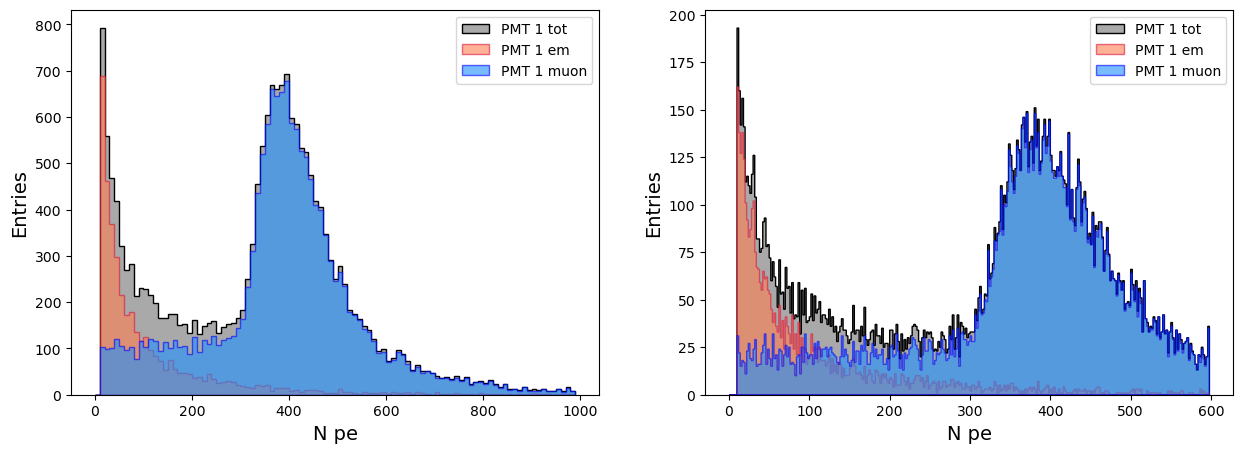

In [102]:
npe_bins = np.arange(0,1000,10)
npe_bins_lim = np.arange(0,600,2)

plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(pmt4_tot_20, bins=npe_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt4_em_20, bins=npe_bins, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt4_mu_20, bins=npe_bins, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,2,2)
plt.hist(pmt4_tot_20, bins=npe_bins_lim, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt4_em_20, bins=npe_bins_lim, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt4_mu_20, bins=npe_bins_lim, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/PMT4_top20cm.pdf')


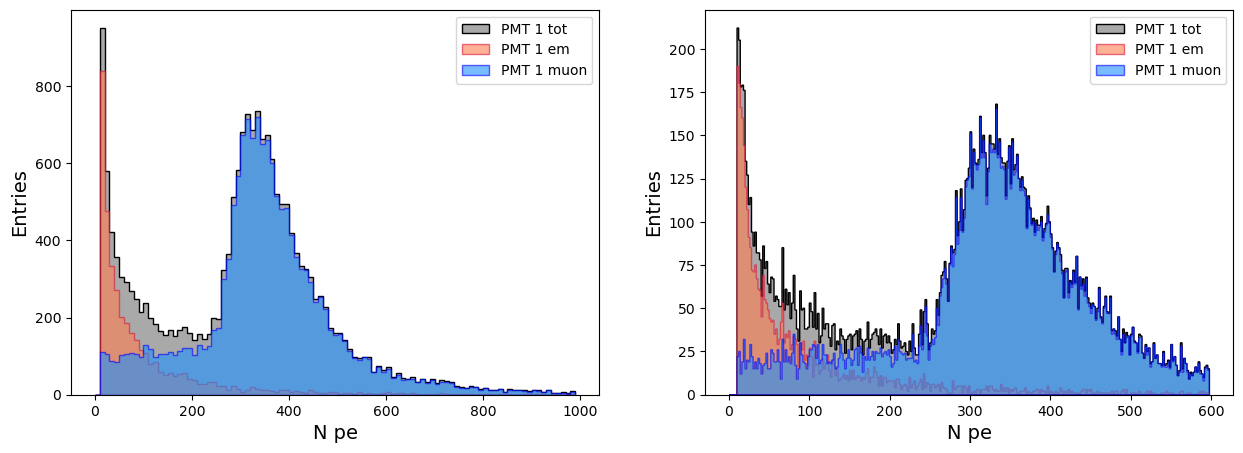

In [103]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(pmt4_tot_40, bins=npe_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt4_em_40, bins=npe_bins, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt4_mu_40, bins=npe_bins, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,2,2)
plt.hist(pmt4_tot_40, bins=npe_bins_lim, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt4_em_40, bins=npe_bins_lim, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt4_mu_40, bins=npe_bins_lim, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/PMT4_top40cm.pdf')


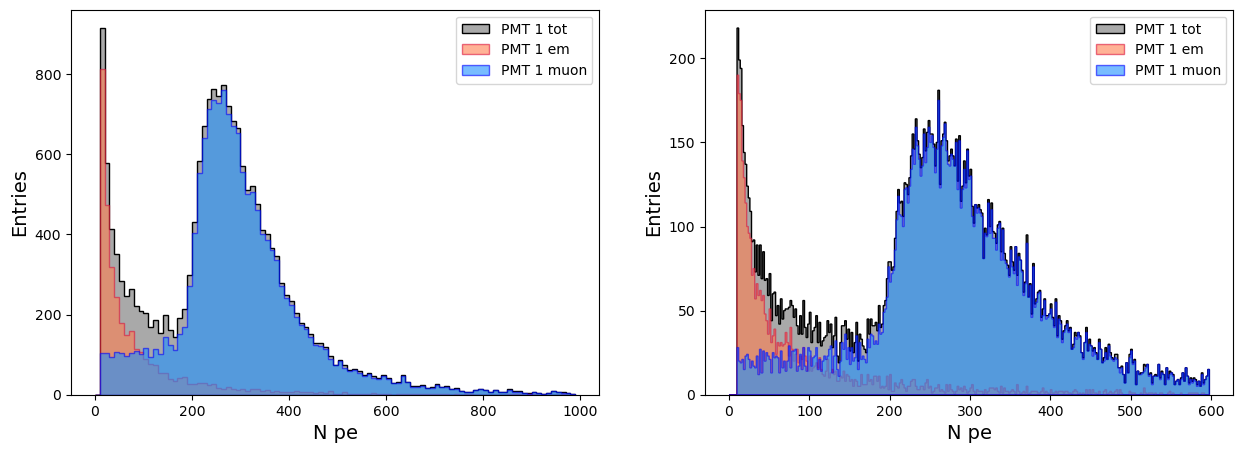

In [104]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(pmt4_tot_60, bins=npe_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt4_em_60, bins=npe_bins, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt4_mu_60, bins=npe_bins, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,2,2)
plt.hist(pmt4_tot_60, bins=npe_bins_lim, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.hist(pmt4_em_60, bins=npe_bins_lim, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 1 em')
plt.hist(pmt4_mu_60, bins=npe_bins_lim, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 1 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/PMT4_top60cm.pdf')

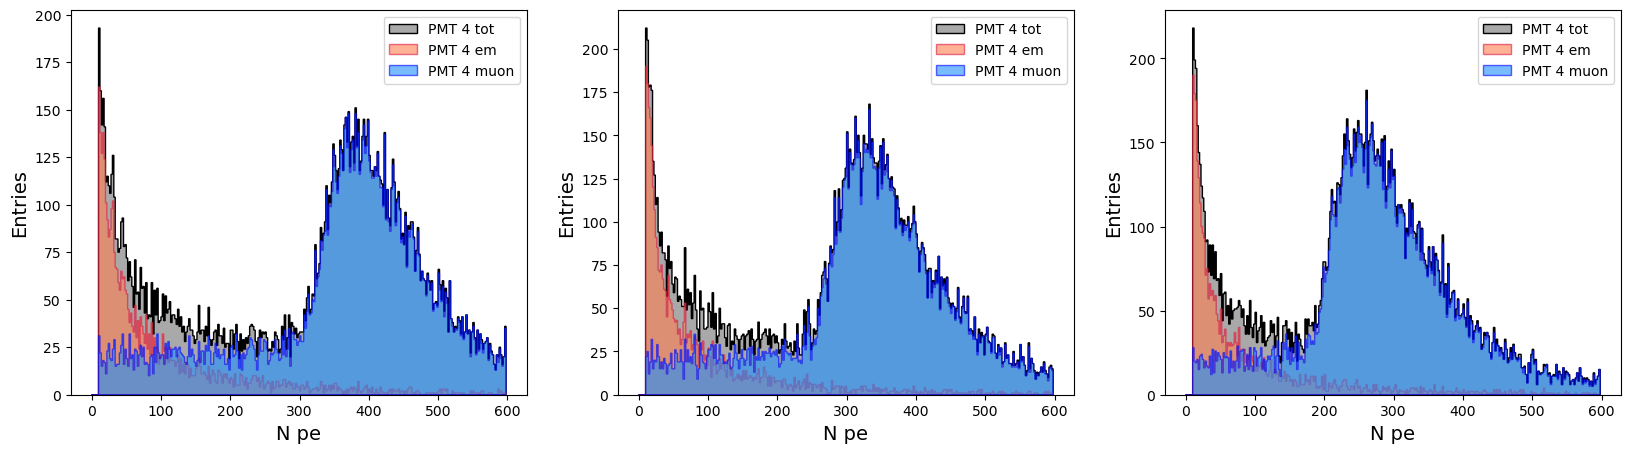

In [105]:
plt.subplots(1,3,figsize=(20,5))

plt.subplot(1,3,1)
plt.hist(pmt4_tot_20, bins=npe_bins_lim, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 4 tot' )
plt.hist(pmt4_em_20, bins=npe_bins_lim, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 4 em')
plt.hist(pmt4_mu_20, bins=npe_bins_lim, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 4 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,3,2)
plt.hist(pmt4_tot_40, bins=npe_bins_lim, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 4 tot' )
plt.hist(pmt4_em_40, bins=npe_bins_lim, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 4 em')
plt.hist(pmt4_mu_40, bins=npe_bins_lim, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 4 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,3,3)
plt.hist(pmt4_tot_60, bins=npe_bins_lim, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 4 tot' )
plt.hist(pmt4_em_60, bins=npe_bins_lim, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='PMT 4 em')
plt.hist(pmt4_mu_60, bins=npe_bins_lim, color = 'dodgerblue', edgecolor='blue',histtype= "stepfilled", label='PMT 4 muon',alpha=0.6)
plt.legend()
plt.yscale('linear')
plt.xlabel('N pe',size=14)
plt.ylabel('Entries',size=14)

plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/PMT4_top_all.pdf')

Text(0, 0.5, 'Entries')

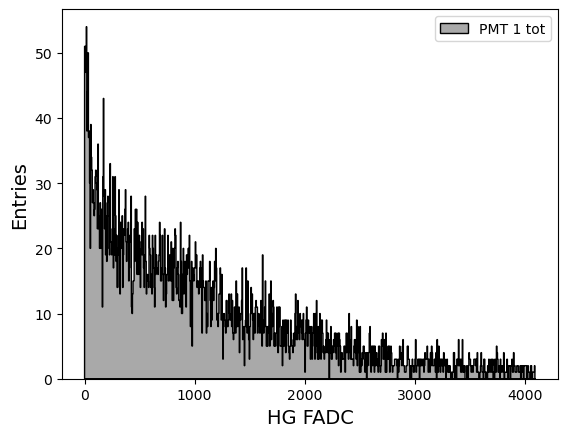

In [106]:
hg_fadc_pmt4 = npe_to_fadc(pmt4_mu_60)

fadc_bins = np.arange(0,MAXFADC,5)
plt.hist(hg_fadc_pmt4, bins=fadc_bins, color='darkgray',edgecolor='black',histtype= "stepfilled", label='PMT 1 tot' )
plt.legend()
plt.yscale('linear')
plt.xlabel('HG FADC',size=14)
plt.ylabel('Entries',size=14)